In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Define image size and batch size
IMG_SIZE = 224
BATCH_SIZE = 32

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2)
train_generator = train_datagen.flow_from_directory("/content/drive/MyDrive/Project 1/archive (11)/chest_xray/train",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training')
val_generator = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/Project 1/archive (11)/chest_xray/train",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

Found 4185 images belonging to 2 classes.
Found 1045 images belonging to 2 classes.


In [5]:
# Define the model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [6]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,validation_data=val_generator,epochs=5)

Epoch 1/5
131/131 [==============================] - 761s 5s/step - loss: 0.2581 - accuracy: 0.9013 - val_loss: 0.1183 - val_accuracy: 0.9578
Epoch 2/5
131/131 [==============================] - 612s 5s/step - loss: 0.0883 - accuracy: 0.9686 - val_loss: 0.1029 - val_accuracy: 0.9664
Epoch 3/5
131/131 [==============================] - 612s 5s/step - loss: 0.0769 - accuracy: 0.9736 - val_loss: 0.1020 - val_accuracy: 0.9588
Epoch 4/5
131/131 [==============================] - 608s 5s/step - loss: 0.0546 - accuracy: 0.9815 - val_loss: 0.1218 - val_accuracy: 0.9549
Epoch 5/5
131/131 [==============================] - 607s 5s/step - loss: 0.0596 - accuracy: 0.9782 - val_loss: 0.1255 - val_accuracy: 0.9559


In [9]:
model.save("Modelu.h5","label.txt")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [10]:
#test your image
from keras.models import load_model  # TensorFlow is required for Keras to work
from PIL import Image,ImageOps
from tensorflow.keras.preprocessing import image
import numpy as np

#load the model
model = load_model('/content/Modelu.h5')
#load and preproces the test image
test_image_path ='/content/drive/MyDrive/Project 1/archive (11)/chest_xray/train/NORMAL/IM-0131-0001.jpeg'
img=image.load_img(test_image_path,target_size=(224,224))
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array/=255

#Make predicitons
prediction = model.predict(img_array)

#print the prediciton
if prediction<0.5:
  print("Prediction :  Pneumonia is present (Probability : ",prediction[0][0],")")
else:
  print("Prediction :  Pneumonia is not present  (Probability : ",prediction[0][0],")")
#classes
class_names = ['you have pneumonia','you are healthy']
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

1/1 [==============================] - 0s 262ms/step
Prediction :  Pneumonia is not present  (Probability :  0.5493911 )


In [11]:
!pip install gtts
from gtts import gTTS
from IPython.display import Audio
if prediction < 0.5:
    text=' you have pneumonia'
else:
      text='no pneumonia'
language = 'en'
output = gTTS(text=text, lang=language, slow=False)
output.save("output.wav")
Audio("output.wav")

In [12]:
!pip install reportlab
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas

# Create a PDF document
pdf_path = "medical_report.pdf"
c = canvas.Canvas(pdf_path, pagesize=letter)

# Write prediction results and corresponding information to the PDF
if prediction < 0.5:
    prediction_text = "Prediction: No pneumonia (probability: {})".format(prediction[0][0])
    precautions_text = "Precautions: Maintain good hygiene,"
    precautions1_text = " avoid smoking, get vaccinated if necessary, "
    precautions2_text =" and practice proper respiratory etiquette."
    c.drawString(100, 700, prediction_text)
    c.drawString(100, 680, precautions_text)
    c.drawString(100, 660, precautions1_text)
    c.drawString(100, 640,precautions2_text)
else:
    prediction_text = "Prediction: Pneumonia (probability: {}, consult the doctor)".format(prediction[0][0])
    cure_text = "Treatment: Follow the prescribed medications,"
    cure_text1 = "get plenty of rest,"
    cure_text2 = "stay hydrated,"
    cure_text3 = "and follow the doctor's instructions closely."
    c.drawString(100, 700, prediction_text)
    c.drawString(100, 680, cure_text)
    c.drawString(100, 660, cure_text1)
    c.drawString(100, 640, cure_text2)
    c.drawString(100, 620, cure_text3)

# Save the PDF document
c.save()
print("Medical report saved as:", pdf_path)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 19.1 MB/s eta 0:00:00
Medical report saved as: medical_report.pdf


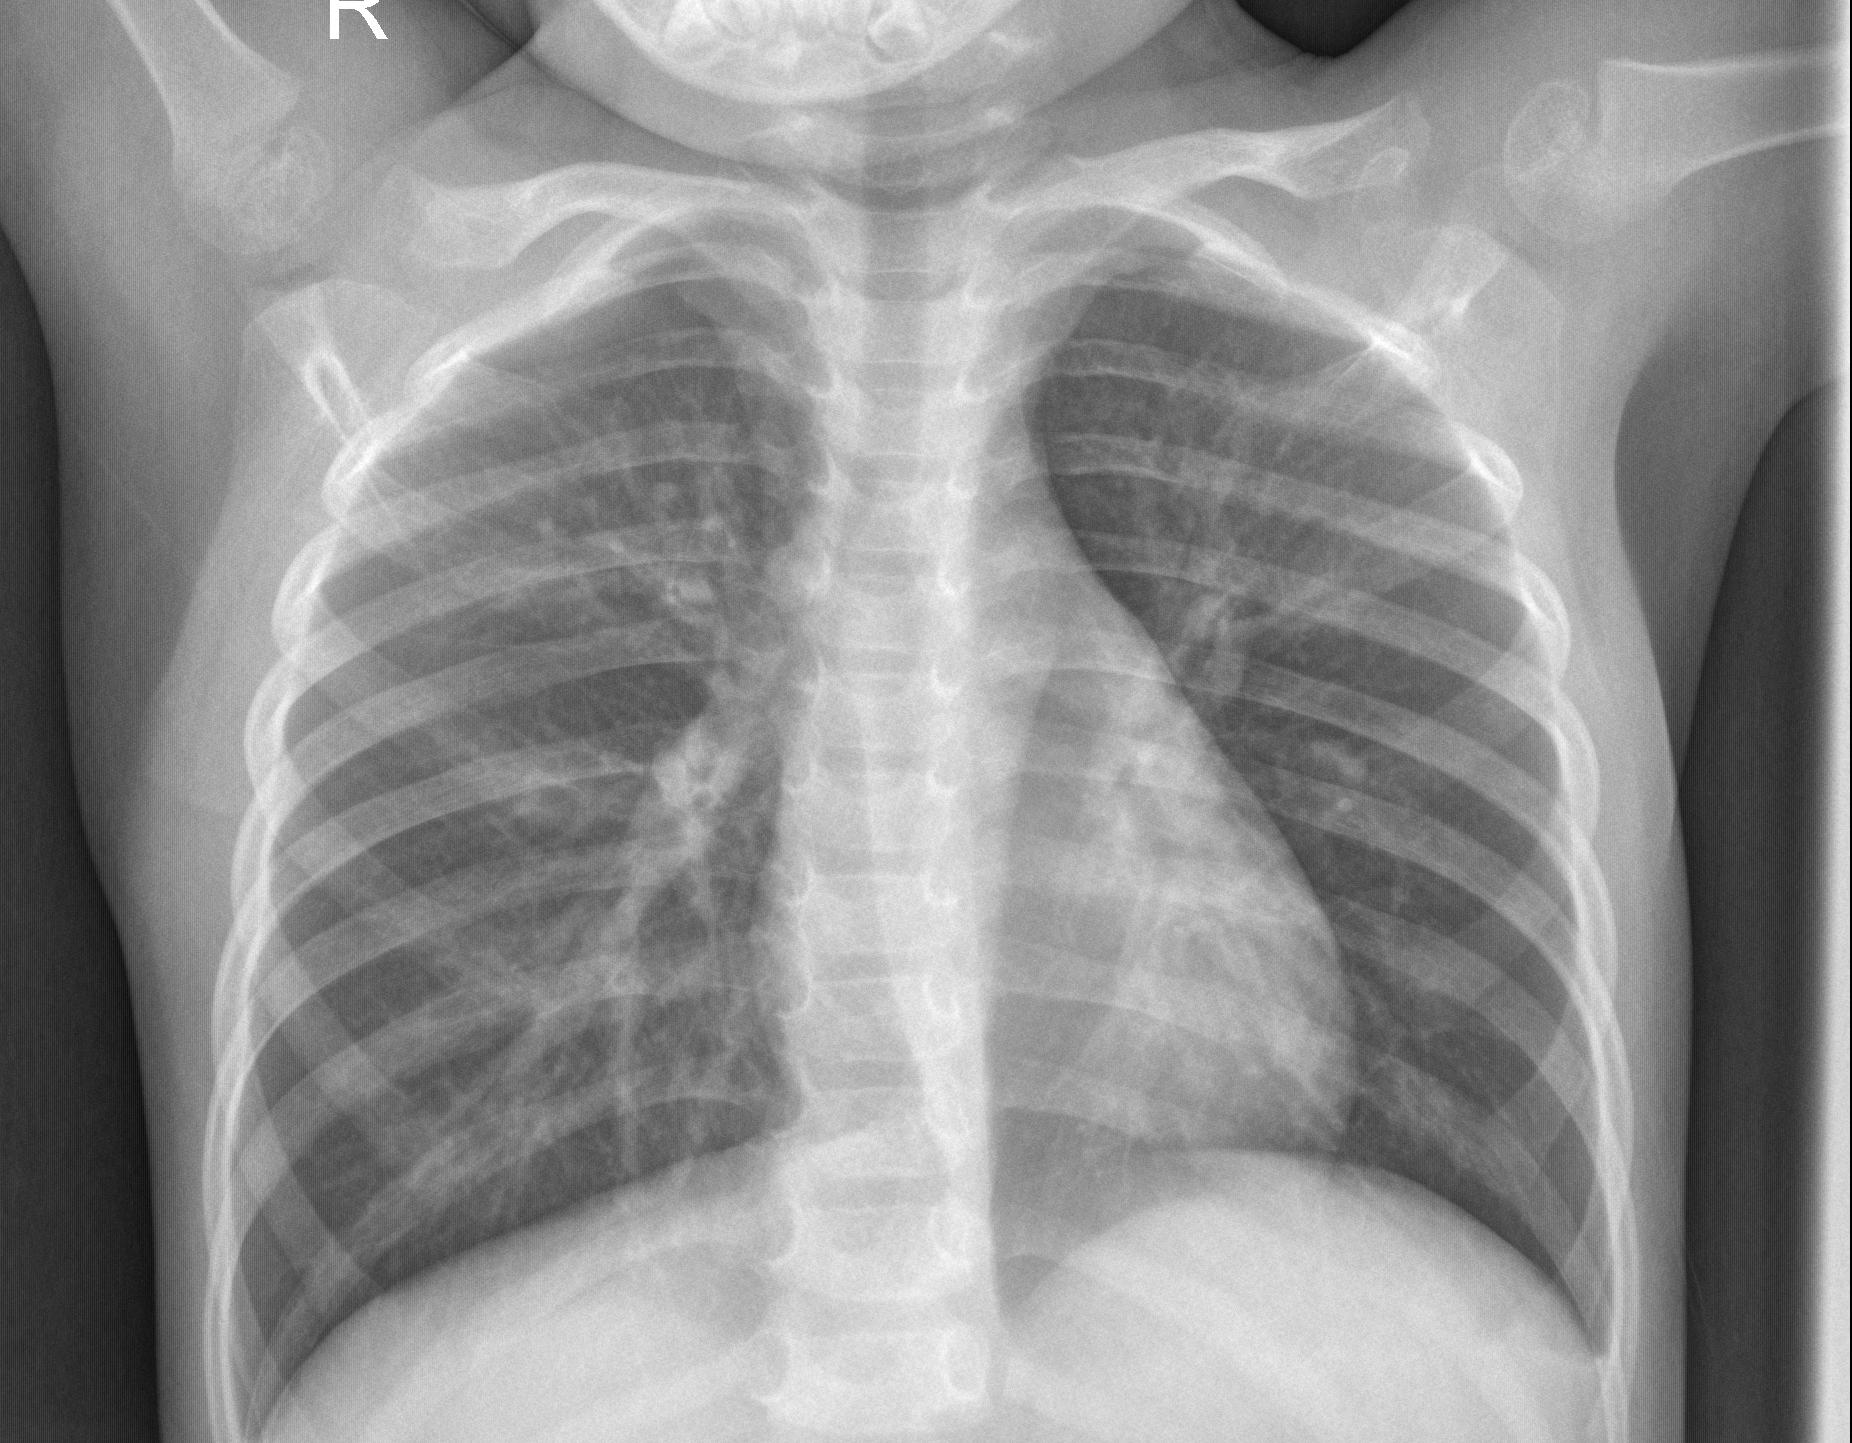

In [14]:
from IPython.display import Image
Image(filename="/content/drive/MyDrive/Project 1/archive (11)/chest_xray/chest_xray/test/NORMAL/IM-0009-0001.jpeg")